In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# 

In [ ]:
#Video

# print("Video : ")

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

def processData(data):
    # print(data)
    X = data.iloc[:,:].values
    X = np.delete(X, 0, 1)
    X = np.delete(X, 1, 1)
    for i in range(len(X)):
        if(isinstance(X[i][5],str) or isinstance(X[i][7],str)):
            X[i] = np.zeros((1, X.shape[1]))

    X = np.mean(X, 0)
    X = np.array(X.reshape(1, -1))
    # print(X)
    # print(X.shape)
    return X

def getData(filename):
    # print(filename)
    data = pd.read_csv(filename,delimiter=',')
    X = processData(data)
    return X

def makeDataPoint(patientNo):
    file1 = (patientNo)+"_CLNF_AUs.txt"
    file2 = (patientNo)+"_CLNF_features.txt"
    file3 = (patientNo)+"_CLNF_features3D.txt"
    file4 = (patientNo)+"_CLNF_gaze.txt"
    file5 = (patientNo)+"_CLNF_hog.txt"
    file6 = (patientNo)+"_CLNF_pose.txt"

    X1 = getData(file1)
    X2 = getData(file2)
    X3 = getData(file3)
    X4 = getData(file4)
    # X5 = getData(file5)
    X6 = getData(file6)

    X = np.concatenate((X1, X2, X3, X4, X6), 1)
    # print(X)
    # print(X.shape)
    return X

count0 = 0
count1 = 0

def makeDataset(location, folder):
    global count0
    global count1
    file  = np.array(pd.read_csv(location,delimiter=',',encoding='utf-8', low_memory=False))[:, 0:2]
    X_temp = np.zeros((1,388))
    Y_temp = []
    for i in range(len(file)):
      if(int(file[i][1]) == 0):
        count0 += 1
        if(count0 >39):
          continue
      patientID = (str(int(file[i][0])))
      #print(patientID)
      string = '/content/drive/My Drive/MCA Dataset/' + folder +"/"+ patientID
      X_temp = np.concatenate((X_temp, makeDataPoint(string)), 0)
      Y_temp.append(int(file[i][1]))
    X_temp = np.delete(X_temp,0,0)
    Y_temp = np.asarray(Y_temp)
    return X_temp, Y_temp





In [ ]:
print("train")
X_train, Y_train = makeDataset('/content/drive/My Drive/MCA Dataset/train_split_Depression_AVEC2017.csv', 'train_data')
print("dev")
X_dev, Y_dev = makeDataset('/content/drive/My Drive/MCA Dataset/dev_split_Depression_AVEC2017.csv', 'dev_data')
count0 = 0
X_train = np.concatenate((X_train, X_dev), 0  )
Y_train = np.concatenate((Y_train, Y_dev), 0  )

print("test")
X_test, Y_test = makeDataset('/content/drive/My Drive/MCA Dataset/full_test_split.csv', 'test_data')

print(Y_train)

train
dev


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,10

test
[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [ ]:
# np.save('/content/drive/My Drive/audio_data/videoML_xtrain.npy', X_train)
# np.save('/content/drive/My Drive/audio_data/videoML_xtest.npy', X_test)
# np.save('/content/drive/My Drive/audio_data/videoML_ytrain.npy', Y_train)
# np.save('/content/drive/My Drive/audio_data/videoML_ytest.npy', Y_test)

In [ ]:
# X_train = np.load('/content/drive/My Drive/audio_data/videoML_xtrain.npy')
# X_test = np.load('/content/drive/My Drive/audio_data/videoML_xtest.npy')
# Y_train = np.load('/content/drive/My Drive/audio_data/videoML_ytrain.npy')
# Y_test = np.load('/content/drive/My Drive/audio_data/videoML_ytest.npy')

# models

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.10597545  0.7562539   0.49019156 ... -1.79536994  0.17531763
  -0.31491738]
 [-0.52555507 -0.90887952  0.6385864  ... -1.42678952  0.28582234
  -0.90343702]
 [ 2.45928632  0.60050928  0.4057917  ... -1.35444052  1.22340489
  -0.31916397]
 ...
 [ 1.24938957 -0.04655008  3.69939457 ... -0.14465841  0.14506043
   0.4184208 ]
 [ 1.50997096 -0.56469359  0.81869417 ... -0.28571969  1.22988828
  -0.69636632]
 [ 2.0434696  -0.85899382 -0.46430977 ...  1.43894123 -1.47238811
  -1.89642009]]
[[-0.99737441  0.60996015  0.28578804 ... -0.07797502  0.58869598
  -2.23244013]
 [-0.42282901  0.77070598 -1.73254779 ...  0.18290487 -1.04139004
  -0.54808756]
 [-0.31115127  0.72214897 -0.28977623 ... -1.5734965  -1.34253206
  -1.08963453]
 ...
 [ 0.00739774  0.60056331  0.79091778 ...  1.52879386  0.00398596
  -1.81896955]
 [-0.28647955 -2.26268319 -0.67844973 ... -0.42977991  2.74780748
  -2.38416019]
 [ 0.5345647   0.19975499  1.5999336  ... -0.89852531 -0.02213174
  -1.01777375]]


In [ ]:
logmodel = LogisticRegression(max_iter=400)
logmodel.fit(X_train,Y_train)

pred_test_log = logmodel.predict(X_test)
pred_log = logmodel.predict(X_train)

print(classification_report(Y_test,pred_test_log))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        33
           1       0.30      0.50      0.38        14

    accuracy                           0.51        47
   macro avg       0.51      0.51      0.49        47
weighted avg       0.59      0.51      0.53        47



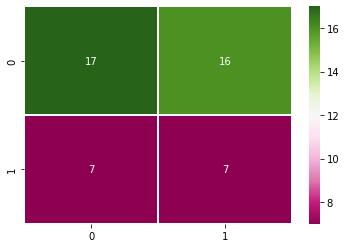

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_test_log)
ax = sns.heatmap(cm, linecolor='white', cmap='PiYG', linewidth=1, annot=True, fmt='')

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train) 

pred_svc = clf.predict(X_train)
pred_test_svc = clf.predict(X_test)
# pred_test_svc [0:5]

print (classification_report(Y_test, pred_test_svc))

              precision    recall  f1-score   support

           0       0.83      0.30      0.44        33
           1       0.34      0.86      0.49        14

    accuracy                           0.47        47
   macro avg       0.59      0.58      0.47        47
weighted avg       0.69      0.47      0.46        47



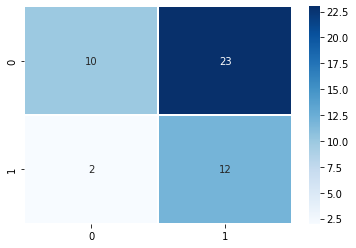

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_test_svc)
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

In [ ]:
k = 45
#Training and Predicting  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
pred_knn = neigh.predict(X_train)
pred_test_knn = neigh.predict(X_test)
pred_test_knn[0:5]

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    pred_test_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, pred_test_knn)

    
    std_acc[n-1]=np.std(pred_test_knn==Y_test)/np.sqrt(pred_test_knn.shape[0])

mean_acc

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6595744680851063 with k= 2


In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_train,Y_train)
pred_test_knn=neigh.predict(X_test)

In [ ]:
print(metrics.classification_report(Y_test, pred_test_knn))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.44      0.50      0.47        14

    accuracy                           0.66        47
   macro avg       0.61      0.61      0.61        47
weighted avg       0.67      0.66      0.67        47



In [ ]:
print(Y_test)

[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0]


In [ ]:
print(pred_test_knn)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 1 1 0 0 1 1]


In [ ]:
X_test.shape

(47, 388)

In [ ]:
print(X_test[5])

[-0.52228006  0.67819757 -0.85955584 -0.77999732 -0.76654742 -1.16518676
 -0.3135692  -1.09102392 -1.02764796 -0.83945623 -0.15845554 -0.34034068
 -0.56011177  0.21776245 -0.05237727  0.18975656  0.69244633  0.62559381
  0.71038862  0.72873243  0.6648492   0.65382156 -0.52235415  0.28566258
 -0.61391219 -0.59247819 -0.56496953 -0.53983039 -0.52395109 -0.505052
 -0.48913517 -0.46850741 -0.44895478 -0.42797834 -0.42055044 -0.42378942
 -0.44376684 -0.48254662 -0.5307292  -0.57798697 -0.6134122  -0.68118345
 -0.74484753 -0.73496697 -0.69951463 -0.66277162 -0.71930215 -0.71179272
 -0.67277608 -0.63587733 -0.62751837 -0.68412216 -0.67964842 -0.67534511
 -0.67075131 -0.61436613 -0.61964104 -0.62936237 -0.62986054 -0.63113652
 -0.68174462 -0.69720254 -0.70164412 -0.69159954 -0.68471723 -0.68022175
 -0.63584884 -0.63465357 -0.6293875  -0.62426589 -0.62360067 -0.62764899
 -0.55217686 -0.57380943 -0.58981377 -0.59937414 -0.6203116  -0.60481235
 -0.56786085 -0.59179051 -0.59841958 -0.58173166 -0.5

In [ ]:
vFusion = X_test[5]

In [ ]:
np.save('/content/drive/My Drive/saved_models/vFusion.npy', vFusion)

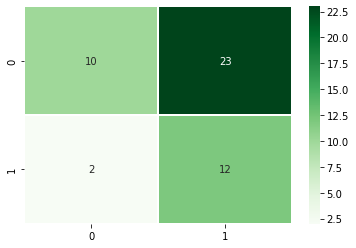

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_test_knn)
ax = sns.heatmap(cm, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')

In [ ]:
#Training
model = GaussianNB()
model.fit(X_train, Y_train)

#Prediction
pred_gaussian = model.predict(X_train)
pred_test_gaussian = model.predict(X_test)

acc_gaussian = metrics.accuracy_score(Y_train, pred_gaussian) * 100
acc_test_gaussian = metrics.accuracy_score(Y_test, pred_test_gaussian) * 100

print("Accuracy train : ", acc_gaussian)
print("Accuracy test : ", acc_test_gaussian)

Accuracy train :  60.49382716049383
Accuracy test :  31.914893617021278


In [ ]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train,Y_train)

pred_decision_tree = DecTree.predict(X_train)
pred_test_decision_tree = DecTree.predict(X_test)

acc_decision_tree = metrics.accuracy_score(Y_train, pred_decision_tree) * 100
acc_test_decision_tree = metrics.accuracy_score(Y_test, pred_test_decision_tree) * 100

print("Accuracy train : ", acc_decision_tree)
print("Accuracy test : ", acc_test_decision_tree)

print(classification_report(Y_test, pred_test_decision_tree))

Accuracy train :  100.0
Accuracy test :  55.319148936170215
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        33
           1       0.35      0.57      0.43        14

    accuracy                           0.55        47
   macro avg       0.55      0.56      0.53        47
weighted avg       0.63      0.55      0.57        47



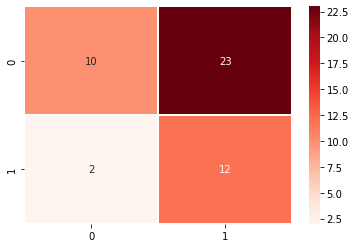

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_test_decision_tree)
ax = sns.heatmap(cm, linecolor='white', cmap='Reds', linewidth=1, annot=True, fmt='')

In [ ]:
print(Y_test)

[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0]


In [ ]:
print(pred_test_decision_tree)

[0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 1 0 0 1 1 1 1 0]


In [ ]:
# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
from sklearn.model_selection import cross_val_score

In [ ]:
def hyperopt_xgb_score(params):
    clf = XGBClassifier(**params)
    current_score = cross_val_score(clf, X_train, Y_train, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_xgb = {
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'eta': hp.quniform('eta', 0.025, 0.5, 0.005),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
            'subsample': hp.quniform('subsample', 0.5, 1, 0.005),
            'gamma': hp.quniform('gamma', 0.5, 1, 0.005),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
            'eval_metric': 'auc',
            'objective': 'binary:logistic',
            'booster': 'gbtree',
            'tree_method': 'exact',
            'silent': 1,
            'missing': None
        }
 
best = fmin(fn=hyperopt_xgb_score, space=space_xgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.5472222222222223
{'booster': 'gbtree', 'colsample_bytree': 0.555, 'eta': 0.45, 'eval_metric': 'auc', 'gamma': 0.905, 'learning_rate': 0.0436, 'max_depth': 11, 'min_child_weight': 2.9250000000000003, 'missing': None, 'n_estimators': 695, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.92, 'tree_method': 'exact'}
0.5611111111111111
{'booster': 'gbtree', 'colsample_bytree': 0.91, 'eta': 0.17500000000000002, 'eval_metric': 'auc', 'gamma': 0.585, 'learning_rate': 0.0448, 'max_depth': 6, 'min_child_weight': 6.075, 'missing': None, 'n_estimators': 747, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.655, 'tree_method': 'exact'}
0.48611111111111105
{'booster': 'gbtree', 'colsample_bytree': 0.685, 'eta': 0.31, 'eval_metric': 'auc', 'gamma': 0.755, 'learning_rate': 0.0059, 'max_depth': 8, 'min_child_weight': 1.4000000000000001, 'missing': None, 'n_estimators': 938, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.59, 'tree_method': 'exact'}
0.4847222222222222

In [ ]:
params = space_eval(space_xgb, best)
params

{'booster': 'gbtree',
 'colsample_bytree': 0.965,
 'eta': 0.035,
 'eval_metric': 'auc',
 'gamma': 0.76,
 'learning_rate': 0.045200000000000004,
 'max_depth': 6,
 'min_child_weight': 2.6500000000000004,
 'missing': None,
 'n_estimators': 667,
 'objective': 'binary:logistic',
 'silent': 1,
 'subsample': 0.54,
 'tree_method': 'exact'}

In [ ]:
XGB_Classifier = XGBClassifier(**params)
# XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train, Y_train)
acc_XGB_Classifier = round(XGB_Classifier.score(X_train, Y_train) * 100, 2)
acc_XGB_Classifier

100.0

In [ ]:
acc_test_XGB_Classifier = round(XGB_Classifier.score(X_test, Y_test) * 100, 2)
acc_test_XGB_Classifier

61.7

In [ ]:
pred_xgb = XGB_Classifier.predict(X_test)

In [ ]:
print(metrics.classification_report(Y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.55      0.67        33
           1       0.42      0.79      0.55        14

    accuracy                           0.62        47
   macro avg       0.64      0.67      0.61        47
weighted avg       0.73      0.62      0.63        47



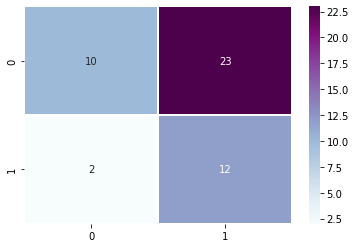

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_xgb)
ax = sns.heatmap(cm, linecolor='white', cmap='BuPu', linewidth=1, annot=True, fmt='')

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [ ]:
def hyperopt_lgb_score(params):
    clf = LGBMClassifier(**params)
    current_score = cross_val_score(clf, X_train, Y_train, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_lgb = {
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'num_leaves': hp.choice('num_leaves', 2*np.arange(2, 2**11, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
            'objective': 'binary',
            'boosting_type': 'gbdt',
            }
 
best = fmin(fn=hyperopt_lgb_score, space=space_lgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.5722222222222222
{'boosting_type': 'gbdt', 'colsample_bytree': 0.92, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 8.575000000000001, 'n_estimators': 465, 'num_leaves': 3858, 'objective': 'binary'}
0.43472222222222223
{'boosting_type': 'gbdt', 'colsample_bytree': 0.785, 'learning_rate': 0.034, 'max_depth': 3, 'min_child_weight': 5.675000000000001, 'n_estimators': 883, 'num_leaves': 2096, 'objective': 'binary'}
0.5347222222222222
{'boosting_type': 'gbdt', 'colsample_bytree': 0.52, 'learning_rate': 0.0123, 'max_depth': 10, 'min_child_weight': 5.025, 'n_estimators': 325, 'num_leaves': 1252, 'objective': 'binary'}
0.5736111111111111
{'boosting_type': 'gbdt', 'colsample_bytree': 0.86, 'learning_rate': 0.0159, 'max_depth': 3, 'min_child_weight': 2.75, 'n_estimators': 455, 'num_leaves': 168, 'objective': 'binary'}
0.5722222222222222
{'boosting_type': 'gbdt', 'colsample_bytree': 0.765, 'learning_rate': 0.0413, 'max_depth': 9, 'min_child_weight': 2.1750000000000003, 'n_estimators

In [ ]:
params = space_eval(space_lgb, best)
params

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.605,
 'learning_rate': 0.048100000000000004,
 'max_depth': 5,
 'min_child_weight': 4.9750000000000005,
 'n_estimators': 755,
 'num_leaves': 1144,
 'objective': 'binary'}

In [ ]:
LGB_Classifier = LGBMClassifier(**params)
LGB_Classifier.fit(X_train, Y_train)
acc_LGB_Classifier = round(LGB_Classifier.score(X_train, Y_train) * 100, 2)
acc_LGB_Classifier

96.3

In [ ]:
acc_test_LGB_Classifier = round(LGB_Classifier.score(X_test, Y_test) * 100, 2)
acc_test_LGB_Classifier

63.83

In [ ]:
pred_lgb = LGB_Classifier.predict(X_test)

In [ ]:
print(metrics.classification_report(Y_test, pred_lgb))

              precision    recall  f1-score   support

           0       0.90      0.55      0.68        33
           1       0.44      0.86      0.59        14

    accuracy                           0.64        47
   macro avg       0.67      0.70      0.63        47
weighted avg       0.76      0.64      0.65        47



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_lgb)
ax = sns.heatmap(cm, linecolor='white', cmap='Greens', linewidth=1, annot=True, fmt='')

In [ ]:
bagging_classifier = BaggingClassifier()
bagging_classifier.fit(X_train, Y_train)
Y_pred = bagging_classifier.predict(X_test).astype(int)
acc_bagging_classifier = round(bagging_classifier.score(X_train, Y_train) * 100, 2)
acc_bagging_classifier

100.0

In [ ]:
acc_test_bagging_classifier = round(bagging_classifier.score(X_test, Y_test) * 100, 2)
acc_test_bagging_classifier

51.06

# nn

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import metrics
from sklearn.metrics import classification_report
from keras import models
from keras import layers

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
## 1. scale
# 2. without scale

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.10597545  0.7562539   0.49019156 ... -1.79536994  0.17531763
  -0.31491738]
 [-0.52555507 -0.90887952  0.6385864  ... -1.42678952  0.28582234
  -0.90343702]
 [ 2.45928632  0.60050928  0.4057917  ... -1.35444052  1.22340489
  -0.31916397]
 ...
 [ 1.24938957 -0.04655008  3.69939457 ... -0.14465841  0.14506043
   0.4184208 ]
 [ 1.50997096 -0.56469359  0.81869417 ... -0.28571969  1.22988828
  -0.69636632]
 [ 2.0434696  -0.85899382 -0.46430977 ...  1.43894123 -1.47238811
  -1.89642009]]
[[-0.99737441  0.60996015  0.28578804 ... -0.07797502  0.58869598
  -2.23244013]
 [-0.42282901  0.77070598 -1.73254779 ...  0.18290487 -1.04139004
  -0.54808756]
 [-0.31115127  0.72214897 -0.28977623 ... -1.5734965  -1.34253206
  -1.08963453]
 ...
 [ 0.00739774  0.60056331  0.79091778 ...  1.52879386  0.00398596
  -1.81896955]
 [-0.28647955 -2.26268319 -0.67844973 ... -0.42977991  2.74780748
  -2.38416019]
 [ 0.5345647   0.19975499  1.5999336  ... -0.89852531 -0.02213174
  -1.01777375]]


In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [ ]:
# creating a model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
print((X_train.shape[1],))

(388,)


In [ ]:
history = model.fit(X_train,
                    Y_train,
                    epochs=50,
                    batch_size=128)

Epoch 1/50
1/1 [==============================] - 1s 516ms/step - loss: 0.7013 - accuracy: 0.4568
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6709 - accuracy: 0.4938
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.5679
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6379 - accuracy: 0.5679
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6180 - accuracy: 0.5679
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6009 - accuracy: 0.6049
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.5853 - accuracy: 0.6420
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.5683 - accuracy: 0.6790
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.5517 - accuracy: 0.7037
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.7407
Epoch 11/50
1/1 [====================

In [ ]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('test_acc: ',test_acc)


2/2 [==============================] - 0s 4ms/step - loss: 2.7261 - accuracy: 0.4468
test_acc:  0.44680851697921753


In [ ]:
predictions = model.predict(X_test)
print(predictions.round())

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
print(classification_report(Y_test, predictions.round()))

              precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.30      0.57      0.39        14

    accuracy                           0.47        47
   macro avg       0.50      0.50      0.46        47
weighted avg       0.58      0.47      0.49        47

